In [1]:
import pandas as pd
import numpy as np
import random

In [111]:
file_path = '/Fraud.csv'
total_rows = sum(1 for line in open(file_path)) - 1

subset_size = 700000
skip_rows = sorted(random.sample(range(1, total_rows + 1), total_rows - subset_size))

df = pd.read_csv(file_path, skiprows=skip_rows)

I only took 700000 rows from entire data because it was max limit in google colab

In [95]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
1,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.00,0,0
2,1,PAYMENT,2560.74,C1648232591,5070.0,2509.26,M972865270,0.0,0.00,0,0
3,1,TRANSFER,311685.89,C1984094095,10835.0,0.00,C932583850,6267.0,2719172.89,0,0
4,1,PAYMENT,9478.39,C1671590089,116494.0,107015.61,M58488213,0.0,0.00,0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            700000 non-null  int64  
 1   type            700000 non-null  object 
 2   amount          700000 non-null  float64
 3   nameOrig        700000 non-null  object 
 4   oldbalanceOrg   700000 non-null  float64
 5   newbalanceOrig  700000 non-null  float64
 6   nameDest        700000 non-null  object 
 7   oldbalanceDest  700000 non-null  float64
 8   newbalanceDest  700000 non-null  float64
 9   isFraud         700000 non-null  int64  
 10  isFlaggedFraud  700000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 58.7+ MB


In [97]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,700000.000000,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,700000.000000,700000.0
mean,243.493884,1.805207e+05,8.359335e+05,8.569524e+05,1.106218e+06,1.231343e+06,0.001284,0.0
std,142.342282,6.310981e+05,2.892685e+06,2.928062e+06,3.476842e+06,3.772752e+06,0.035814,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.340116e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.486596e+04,1.413450e+04,0.000000e+00,1.325808e+05,2.148970e+05,0.000000,0.0
75%,335.000000,2.081698e+05,1.073348e+05,1.438940e+05,9.414184e+05,1.109279e+06,0.000000,0.0
max,743.000000,6.423445e+07,4.489219e+07,4.143236e+07,3.025609e+08,3.022754e+08,1.000000,0.0


**NULL VALUES TREATMENT**

In [98]:
def missing(data):
    total = data.isnull().sum()
    percentage = total /len(data) *100
    missing_percentage = pd.concat([total  , percentage] , axis = 1 , keys = ['Total' , 'Percentage'])
    return missing_percentage

In [112]:
missing_Data = missing(df).sort_values(by = 'Percentage' , ascending = False)

In [113]:
missing_Data

,Total,Percentage
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


THERE ARE NO NULL VALUES IN THE DATA SET

**OUTLIERS TREATMENT**

In [105]:
def remove_outliers_iqr(df, threshold=1.5):
    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Filter outliers from each column
    filtered_data = df[(df >= lower_bound) & (df <= upper_bound)]

    return filtered_data

Removing outliers from all columns

In [ ]:
df = remove_outliers_iqr(df, threshold=1.5)

TARGET VARIABLE value counts

In [114]:
x = df.isFraud.value_counts()
x

0    699117
1       883
Name: isFraud, dtype: int64

ENCODING

In [115]:
df.type.value_counts()

CASH_OUT    245985
PAYMENT     237006
CASH_IN     154074
TRANSFER     58409
DEBIT         4526
Name: type, dtype: int64

In [116]:
df_encoded = pd.get_dummies(df, columns=['type'])
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
1,1,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.0,0,0,0,0,0,1,0
2,1,4098.78,C1026483832,503264.0,499165.22,M1635378213,0.0,0.0,0,0,0,0,0,1,0
3,1,1157.86,C1237762639,21156.0,19998.14,M1877062907,0.0,0.0,0,0,0,0,0,1,0
4,1,3876.41,C504336483,67852.0,63975.59,M1404932042,0.0,0.0,0,0,0,0,0,1,0


DROPPING THE COLUMNS

In [118]:
df_encoded.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

MODEL BULDING

I will use pycaret library to build classification model which is time saving compared to sklearn and scipy libraries`



In [124]:
from pycaret.classification import *

In [126]:
x = df_encoded.drop(labels='isFraud',axis=1)
y = df_encoded['isFraud']

In [127]:
clf1 = setup(df_encoded, target='isFraud', session_id=123)

,Description,Value
0,Session id,123
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(700000, 13)"
4,Transformed data shape,"(700000, 13)"
5,Transformed train set shape,"(489999, 13)"
6,Transformed test set shape,"(210001, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [130]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9997,0.9972,0.7719,0.9637,0.8568,0.8566,0.8621,0.7530
rf,Random Forest Classifier,0.9996,0.9881,0.7266,0.9826,0.8349,0.8347,0.8445,1.3520
et,Extra Trees Classifier,0.9996,0.9723,0.6618,0.9902,0.7924,0.7922,0.8089,1.5630
dt,Decision Tree Classifier,0.9995,0.8883,0.7768,0.8054,0.7903,0.7901,0.7905,0.3740
ada,Ada Boost Classifier,0.9994,0.9958,0.5665,0.9264,0.7006,0.7003,0.7228,1.1270
knn,K Neighbors Classifier,0.9993,0.8678,0.5763,0.8566,0.6872,0.6869,0.7013,11.1710
lda,Linear Discriminant Analysis,0.9991,0.9439,0.3706,0.8353,0.5108,0.5105,0.5544,0.2760
gbc,Gradient Boosting Classifier,0.9990,0.7119,0.3772,0.7613,0.4601,0.4597,0.5060,0.4390
ridge,Ridge Classifier,0.9989,0.0000,0.1231,1.0000,0.2178,0.2176,0.3476,0.2430
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

2.Describe your fraud detection model in elaboration


*   For this problem i have tried to build different classification models like xgboost,adaboost,randomforest,decisiontrees,k neighbors,logistic regression etc
*   Trining and testing set of data was (489999, 13) and testing set was (210001, 13)




*   comparing all the above model we can say that extreme gradient boost model is the best model
*   From the above table we can see different classification metrics being higher for xgbooost



In [133]:
save_model(best_model,model_name='xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['step', 'amount', 'oldbalanceOrg',
                                              'newbalanceOrig', 'oldbalanceDest',
                                              'newbalanceDest', 'isFlaggedFraud',
                                              'type_CASH_IN', 'type_CASH_OUT',
                                              'type_DEBIT', 'type_PAYMENT',
                                              'type_TRANSFER'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
          

3. How did you select variables to be included in the model?


*   At first i tried to remove all unwanted columns which are not usefull for model building
*   As there were not too many columns i did not use feature elimination techniques like recurssive,forward and backward elimination techniquies and tried to retain as many columns as possible



4. Demonstrate the performance of the model by using best set of tools.


*   Please go through below table for detailed scores of different classification metrics



In [136]:
best_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9877,0.8197,0.9259,0.8696,0.8694,0.8710
1,0.9997,0.9998,0.7742,0.9796,0.8649,0.8647,0.8707
2,0.9996,0.9997,0.7419,0.9200,0.8214,0.8212,0.8260
3,0.9996,0.9870,0.7097,0.9362,0.8073,0.8071,0.8149
4,0.9996,0.9997,0.7097,0.9565,0.8148,0.8146,0.8237
5,0.9998,0.9993,0.8226,1.0000,0.9027,0.9025,0.9069
6,0.9997,0.9997,0.8065,0.9804,0.8850,0.8848,0.8891
7,0.9997,0.9998,0.7903,0.9800,0.8750,0.8749,0.8799
8,0.9997,0.9998,0.7742,0.9796,0.8649,0.8647,0.8707


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

5. What are the key factors that predict fraudulent customer?

*   From the below chart we can say that type_cash_out,new_balanceorig,oldbalanceorg are effecting the prediction of fradulent customer

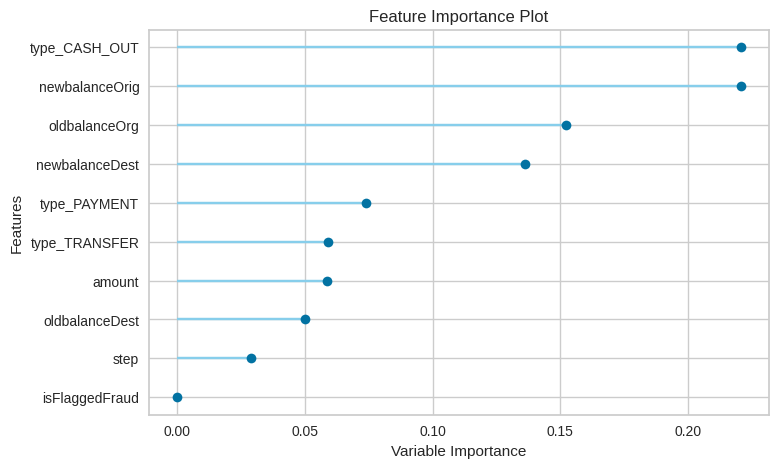

In [135]:
plot_model(best_model, plot='feature')

6.Do these factors make sense? If yes, How? If not, How not?


*   Yes cash_out factor may affect in fradulent transactions we can say that fraud is general to happen if direct cash transfers are involed
*    initial and new balance after the transaction



7. What kind of prevention should be adopted while company update its infrastructure?


*   Well company can mainly focus on cash_out transactions and they can closely moniter whats going wrong there
*   And company can also monitor  initial  and new balance after the transaction if something can be identified if transactions aint normal

